# Imports


In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

c:\Users\manse\OneDrive\Desktop\dynamic-clustering\notebooks
c:\Users\manse\OneDrive\Desktop\dynamic-clustering


In [2]:
import numpy as np
from scripts.gaussian.streaming_clusterer import CluStream
from scripts.gaussian.dynamic_clusterer_multidimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [3]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

In [4]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
# file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [ ]:
def init_dynamic_clusterer(data=reference_data, threshold=2.5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data,
        clustream_model,
        drift_detector,
        colors,
        ax_limit=10,
        phi=100,
        alpha=0.9,
        epsilon=0,
        n_points_per_dimension=500
    )

    return dynamic_clusterer

New model created - id: 52241
(id: 0)
(id: 1)
timestamp 100 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.707693001534312), np.float64(5.150806579303515), np.float64(9.261356511242132), np.float64(7.569929252658103)]
prod0 - center: [np.float64(5.2447900665773135), np.float64(4.894559993024761), np.float64(9.14871002114009), np.float64(7.659021300674779)]
overlapping score: 0.4365079365079365

ref0 - center: [np.float64(5.707693001534312), np.float64(5.150806579303515), np.float64(9.261356511242132), np.float64(7.569929252658103)]
prod1 - center: [np.float64(3.15452324155227), np.float64(7.576695180080617), np.float64(10.722913415293645), np.float64(10.727319061660353)]
overlapping score: 0.0

ref1 - center: [np.float64(3.565996066574339), np.float64(7.768456296786395), np.float64(10.614812503033932), np.float64(10.838149732887883)]
prod0 - center: [np.float64(5.2447900665773135), np.float64(4.894559993024761), np.float64(9.14871002114009), np.float64(7.659021300674779)

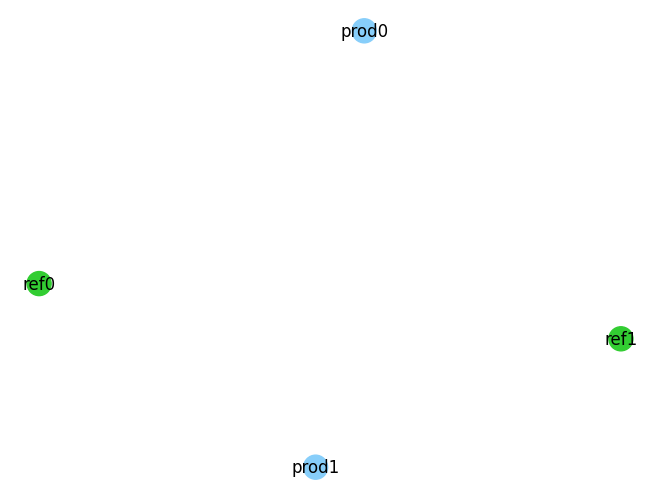

(!) (id: 0) DISAPPEARED
(!) (id: 1) DISAPPEARED
(!) (id: 2) APPEARED
(!) (id: 3) APPEARED

Final macroclusters:
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

timestamp 200 ----> Apply macroclustering <!>

ref2 - center: [np.float64(5.2447900665773135), np.float64(4.894559993024761), np.float64(9.14871002114009), np.float64(7.659021300674779)]
prod0 - center: [np.float64(3.155024474951411), np.float64(7.566309390216291), np.float64(10.611826816218116), np.float64(10.730639123078184)]
overlapping score: 0.0

ref2 - center: [np.float64(5.2447900665773135), np.float64(4.894559993024761), np.float64(9.14871002114009), np.float64(7.659021300674779)]
prod1 - center: [np.float64(5.000333916989721), np.float64(4.8117149468727085), np.float64(9.189524346722107), np.float64(7.747267280284766)]
overlapping score: 0.7698412698412699

ref3 - center: [np.float64(3.15452324155227), np.float64(7.576695180080617), np.float64(10.722913415293645), np

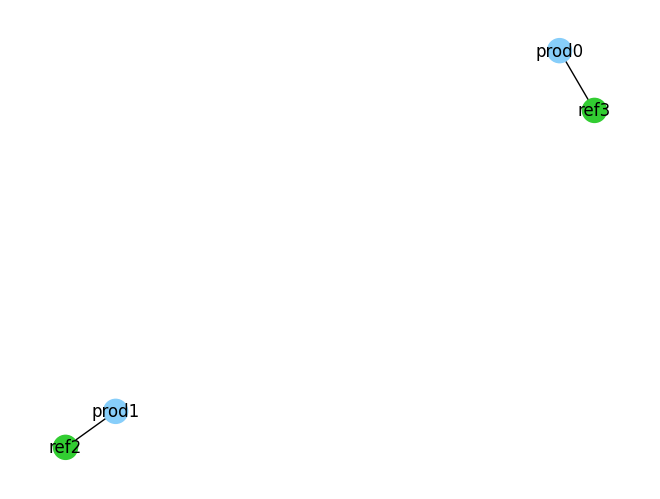

(id: 3) SURVIVED as (id: 3)
(id: 2) SURVIVED as (id: 2)

Final macroclusters:
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

timestamp 300 ----> Apply macroclustering <!>

ref2 - center: [np.float64(5.000333916989721), np.float64(4.8117149468727085), np.float64(9.189524346722107), np.float64(7.747267280284766)]
prod0 - center: [np.float64(2.7732485836640532), np.float64(7.102245983382568), np.float64(10.146721953439098), np.float64(10.557618628307779)]
overlapping score: 0.0

ref2 - center: [np.float64(5.000333916989721), np.float64(4.8117149468727085), np.float64(9.189524346722107), np.float64(7.747267280284766)]
prod1 - center: [np.float64(2.964186858301089), np.float64(4.03745532526637), np.float64(8.881609948468226), np.float64(8.079047014334538)]
overlapping score: 0.0

ref2 - center: [np.float64(5.000333916989721), np.float64(4.8117149468727085), np.float64(9.189524346722107), np.float64(7.747267280284766)]
prod2 - center: [n

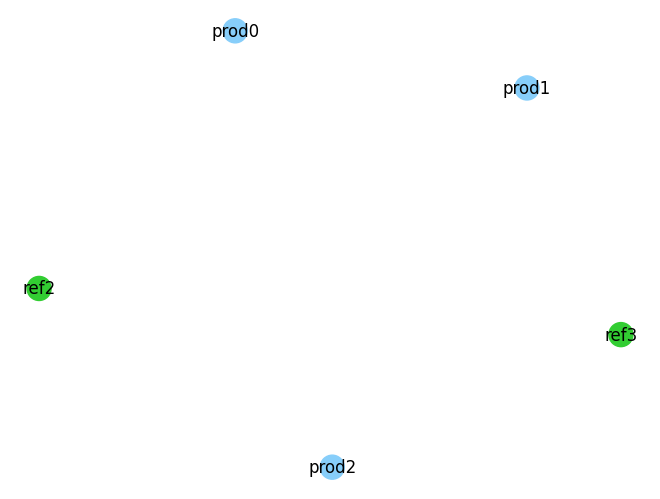

(!) (id: 2) DISAPPEARED
(!) (id: 3) DISAPPEARED
(!) (id: 4) APPEARED
(!) (id: 5) APPEARED
(!) (id: 6) APPEARED

Final macroclusters:
(id: 4)
(id: 5)
(id: 6)

-----------------------------------------------------------------------------------

timestamp 400 ----> Apply macroclustering <!>

ref4 - center: [np.float64(2.7732485836640532), np.float64(7.102245983382568), np.float64(10.146721953439098), np.float64(10.557618628307779)]
prod0 - center: [np.float64(1.8827883595161885), np.float64(6.188821466054638), np.float64(9.359790049814615), np.float64(10.088357540759548)]
overlapping score: 0.05291005291005291

ref4 - center: [np.float64(2.7732485836640532), np.float64(7.102245983382568), np.float64(10.146721953439098), np.float64(10.557618628307779)]
prod1 - center: [np.float64(5.951492838132746), np.float64(5.1775857320046645), np.float64(9.219026064435482), np.float64(7.5372389849555885)]
overlapping score: 0.0

ref4 - center: [np.float64(2.7732485836640532), np.float64(7.1022459833825

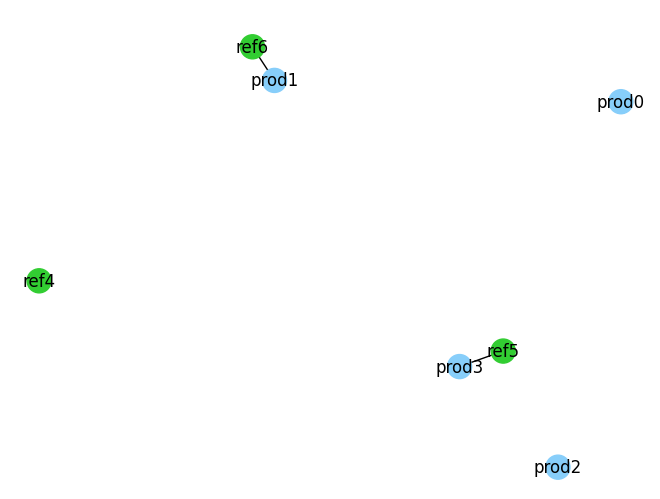

(!) (id: 4) DISAPPEARED
(!) (id: 7) APPEARED
(id: 6) SURVIVED as (id: 6)
(!) (id: 8) APPEARED
(id: 5) SURVIVED as (id: 5)

Final macroclusters:
(id: 5)
(id: 6)
(id: 7)
(id: 8)

-----------------------------------------------------------------------------------

timestamp 500 ----> Apply macroclustering <!>

ref5 - center: [np.float64(2.8300182986818556), np.float64(4.087817738811733), np.float64(8.972778445782684), np.float64(8.186119850614906)]
prod0 - center: [np.float64(1.7149110653563122), np.float64(5.98066007086513), np.float64(9.346748597277195), np.float64(10.133811483518034)]
overlapping score: 0.0

ref5 - center: [np.float64(2.8300182986818556), np.float64(4.087817738811733), np.float64(8.972778445782684), np.float64(8.186119850614906)]
prod1 - center: [np.float64(5.9073305558485085), np.float64(5.185843105874058), np.float64(9.211408967207245), np.float64(7.54499946066065)]
overlapping score: 0.0

ref5 - center: [np.float64(2.8300182986818556), np.float64(4.087817738811733),

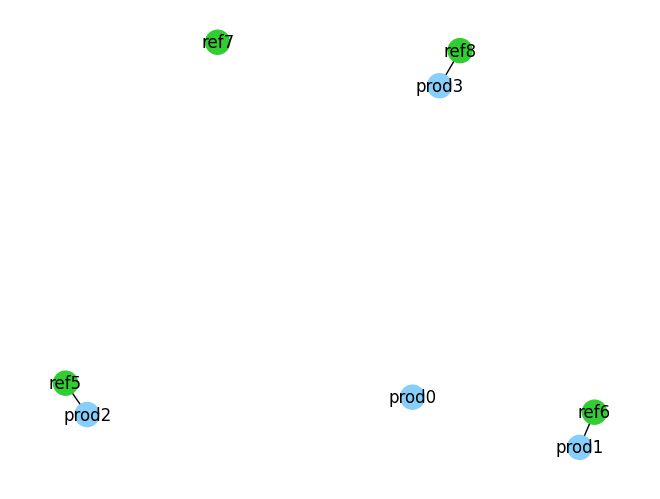

(!) (id: 7) DISAPPEARED
(!) (id: 9) APPEARED
(id: 6) SURVIVED as (id: 6)
(id: 5) SURVIVED as (id: 5)
(id: 8) SURVIVED as (id: 8)

Final macroclusters:
(id: 5)
(id: 6)
(id: 8)
(id: 9)

-----------------------------------------------------------------------------------

timestamp 600 ----> Apply macroclustering <!>

ref5 - center: [np.float64(2.611682638801752), np.float64(4.0453134151378904), np.float64(8.86997399872223), np.float64(8.299176608539296)]
prod0 - center: [np.float64(1.7259958645162277), np.float64(6.007672834542449), np.float64(9.353787549834179), np.float64(10.091987949186286)]
overlapping score: 0.0

ref5 - center: [np.float64(2.611682638801752), np.float64(4.0453134151378904), np.float64(8.86997399872223), np.float64(8.299176608539296)]
prod1 - center: [np.float64(5.908114276118898), np.float64(5.186314661526664), np.float64(9.21166920414903), np.float64(7.5447982253569625)]
overlapping score: 0.0

ref5 - center: [np.float64(2.611682638801752), np.float64(4.045313415137

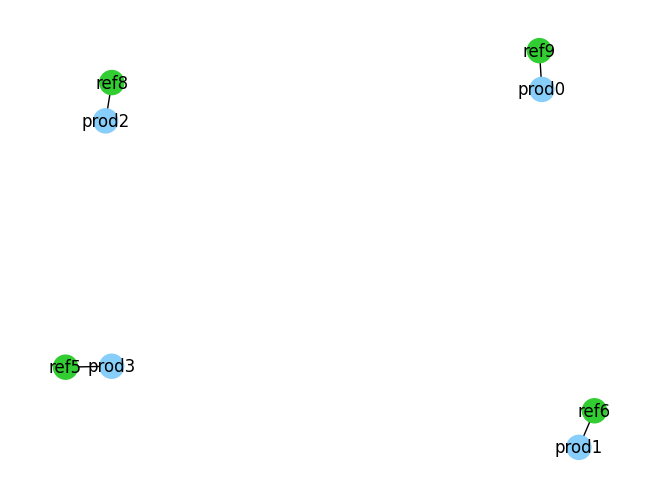

(id: 9) SURVIVED as (id: 9)
(id: 6) SURVIVED as (id: 6)
(id: 8) SURVIVED as (id: 8)
(id: 5) SURVIVED as (id: 5)

Final macroclusters:
(id: 5)
(id: 6)
(id: 8)
(id: 9)

-----------------------------------------------------------------------------------

timestamp 700 ----> Apply macroclustering <!>

ref5 - center: [np.float64(2.587835276362413), np.float64(4.093687363129062), np.float64(8.792962208759924), np.float64(8.345875132372068)]
prod0 - center: [np.float64(2.089062935034826), np.float64(4.723321321118492), np.float64(8.960267569035246), np.float64(8.999932083390151)]
overlapping score: 0.31746031746031744

ref5 - center: [np.float64(2.587835276362413), np.float64(4.093687363129062), np.float64(8.792962208759924), np.float64(8.345875132372068)]
prod1 - center: [np.float64(3.5290171674865496), np.float64(7.686175410431652), np.float64(10.578190579851386), np.float64(10.882899719197045)]
overlapping score: 0.0

ref5 - center: [np.float64(2.587835276362413), np.float64(4.093687363129

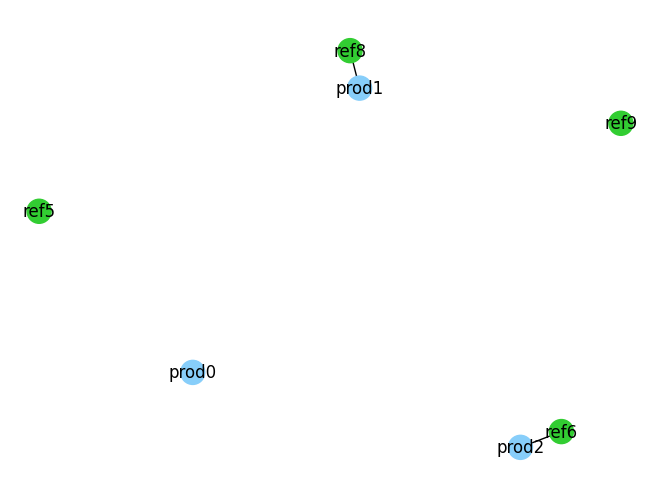

(!) (id: 5) DISAPPEARED
(!) (id: 9) DISAPPEARED
(!) (id: 10) APPEARED
(id: 8) SURVIVED as (id: 8)
(id: 6) SURVIVED as (id: 6)

Final macroclusters:
(id: 6)
(id: 8)
(id: 10)

-----------------------------------------------------------------------------------

timestamp 800 ----> Apply macroclustering <!>

ref6 - center: [np.float64(5.933862056960952), np.float64(5.164734964460463), np.float64(9.197517513435237), np.float64(7.543393196158619)]
prod0 - center: [np.float64(2.068119476848191), np.float64(4.7639257100205485), np.float64(8.963411255015929), np.float64(9.063411047257)]
overlapping score: 0.0

ref6 - center: [np.float64(5.933862056960952), np.float64(5.164734964460463), np.float64(9.197517513435237), np.float64(7.543393196158619)]
prod1 - center: [np.float64(3.5769783600855694), np.float64(7.789413516766462), np.float64(10.693143867036628), np.float64(10.827268271996012)]
overlapping score: 0.0

ref6 - center: [np.float64(5.933862056960952), np.float64(5.164734964460463), np.fl

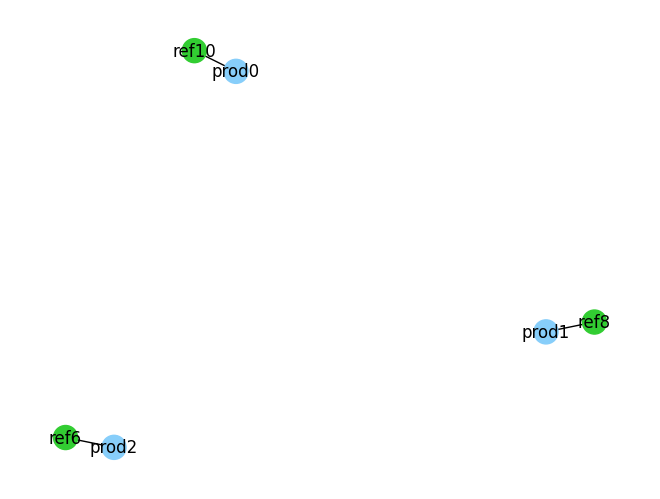

(id: 10) SURVIVED as (id: 10)
(id: 8) SURVIVED as (id: 8)
(id: 6) SURVIVED as (id: 6)

Final macroclusters:
(id: 6)
(id: 8)
(id: 10)

-----------------------------------------------------------------------------------

timestamp 900 ----> Apply macroclustering <!>

ref6 - center: [np.float64(5.907280681287253), np.float64(5.1858130973500165), np.float64(9.211392408704452), np.float64(7.54501226504066)]
prod0 - center: [np.float64(2.213342588945481), np.float64(4.096285133436927), np.float64(8.74060684882131), np.float64(8.598682339690797)]
overlapping score: 0.0

ref6 - center: [np.float64(5.907280681287253), np.float64(5.1858130973500165), np.float64(9.211392408704452), np.float64(7.54501226504066)]
prod1 - center: [np.float64(3.5994671440837798), np.float64(7.794860368789085), np.float64(10.709648045429766), np.float64(10.82834914746383)]
overlapping score: 0.0

ref6 - center: [np.float64(5.907280681287253), np.float64(5.1858130973500165), np.float64(9.211392408704452), np.float64(7.

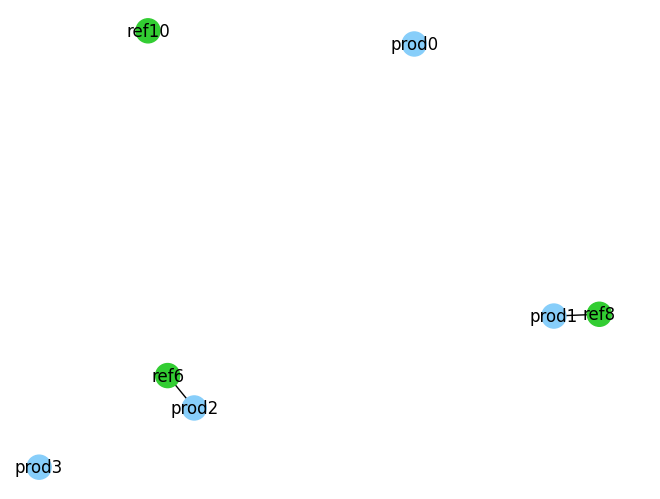

(!) (id: 10) DISAPPEARED
(!) (id: 11) APPEARED
(id: 8) SURVIVED as (id: 8)
(id: 6) SURVIVED as (id: 6)
(!) (id: 12) APPEARED

Final macroclusters:
(id: 6)
(id: 8)
(id: 11)
(id: 12)

-----------------------------------------------------------------------------------

timestamp 1000 ----> Apply macroclustering <!>

ref6 - center: [np.float64(5.907280663081669), np.float64(5.1858130863947105), np.float64(9.21139240265948), np.float64(7.545012269713791)]
prod0 - center: [np.float64(3.5994549630702557), np.float64(7.794847322479696), np.float64(10.709635674383973), np.float64(10.82835216648956)]
overlapping score: 0.0

ref6 - center: [np.float64(5.907280663081669), np.float64(5.1858130863947105), np.float64(9.21139240265948), np.float64(7.545012269713791)]
prod1 - center: [np.float64(5.9072806631511545), np.float64(5.18581308643648), np.float64(9.211392402682511), np.float64(7.545012269695933)]
overlapping score: 1.0

ref6 - center: [np.float64(5.907280663081669), np.float64(5.1858130863947

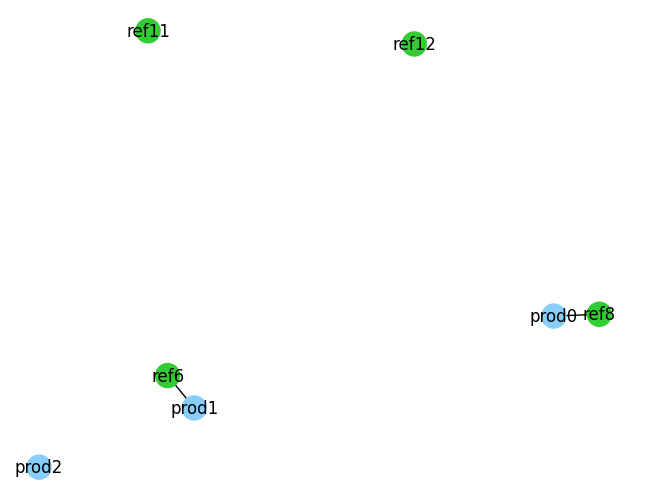

(!) (id: 11) DISAPPEARED
(!) (id: 12) DISAPPEARED
(id: 8) SURVIVED as (id: 8)
(id: 6) SURVIVED as (id: 6)
(!) (id: 13) APPEARED

Final macroclusters:
(id: 6)
(id: 8)
(id: 13)

-----------------------------------------------------------------------------------



In [6]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(
    print_graph=True, print_statistics=True, macroclustering_at_end=False
)

Creating the directory...
Drawing ...


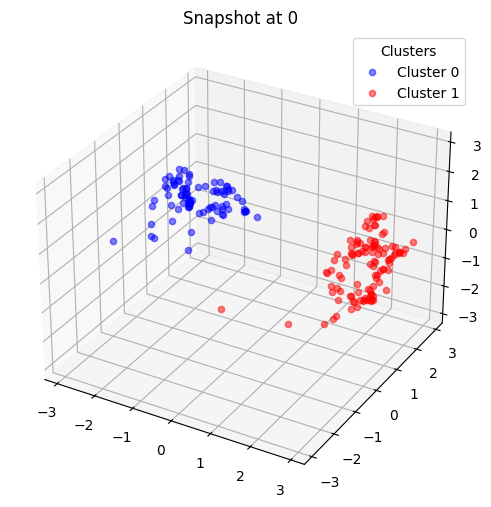

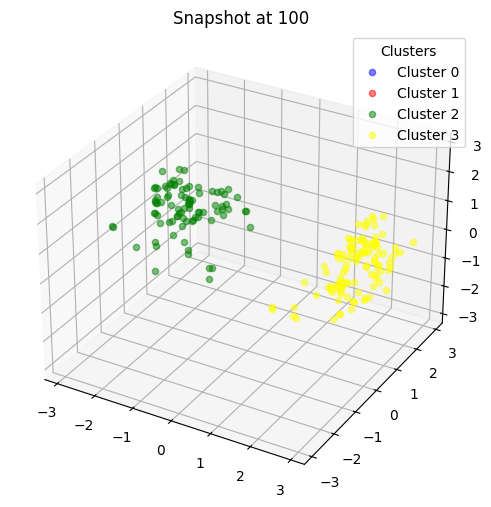

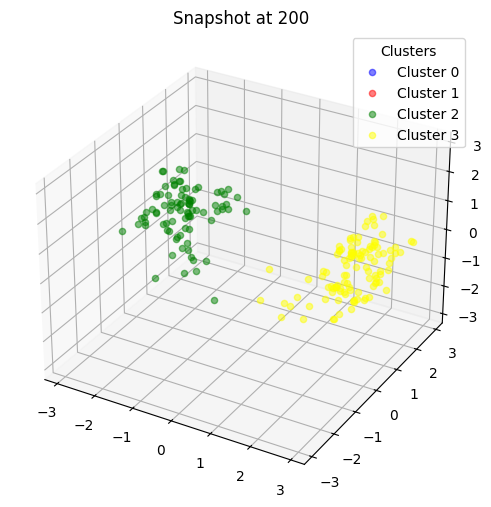

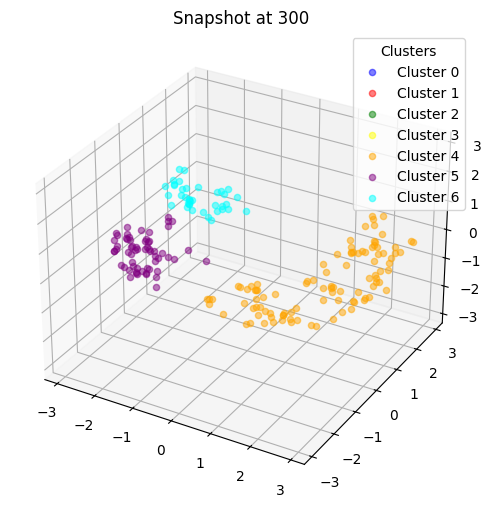

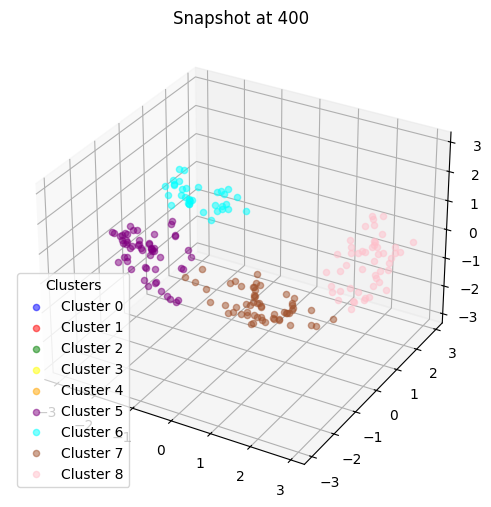

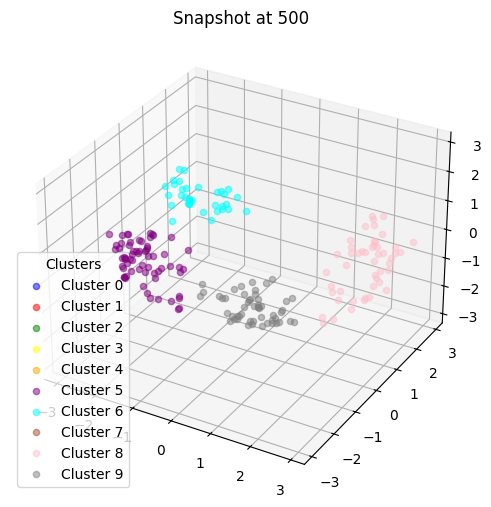

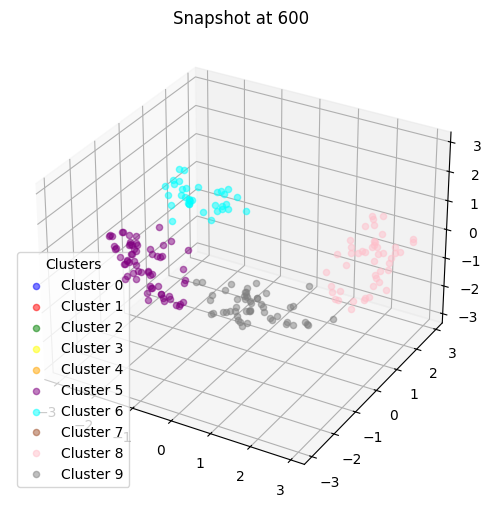

In [ ]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=True)